# Taller 4.
### Oscar Mejia
### 201516790 
*** 

In [47]:
%pylab inline
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
import random as rd
from scipy import ndimage
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter1d
import pandas as pd
from IPython.display import Markdown as md

Populating the interactive namespace from numpy and matplotlib


## 12.1 Bases de Serie de Fourier y la Transformada de Fourier

In [48]:
def sech(x):
    return 1/(math.cosh(x))

Ejercicio 1 
$$ f(x) = exp(-\alpha x^2) \rightarrow \hat{f}(k)= \frac{1}{\sqrt{2\alpha}}exp(\frac{-k^2}{4\alpha})$$  

Text(0.5,1,'Shifted transform')

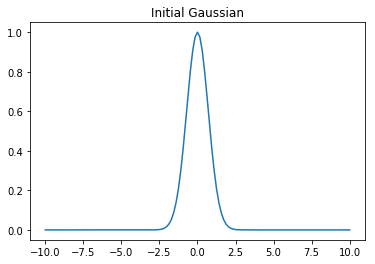

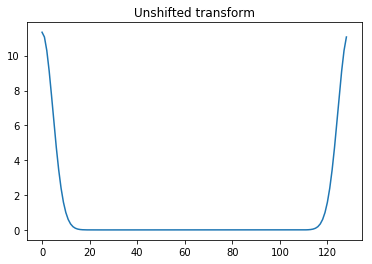

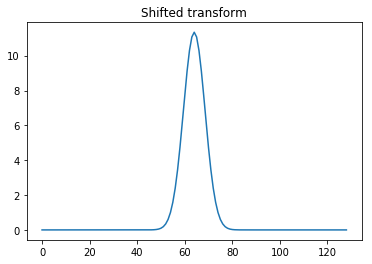

In [49]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=[]
for i, k in enumerate(x2):
    if i<n+1:
        x.append(k)
x=np.array(x)
u=exp(-x*x)
ut=np.fft.fft(u)
utshift=fftshift(ut)

plt.figure()
plt.plot(x,u)
plt.title('Initial Gaussian')

plt.figure()
plt.plot(abs(ut))
plt.title('Unshifted transform')

plt.figure()
plt.plot(abs(utshift))
plt.title('Shifted transform')

** Ejercicio 2**  

Calcular  la derivada de una funcion con el uso del FFT  
$$ u(x)= sech(x) $$
$$ \frac{du}{dt}=-sech(x)tanh(x) $$
$$ \frac{d^2u}{dt^2}=sech(x)-2sech^3(x) $$

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


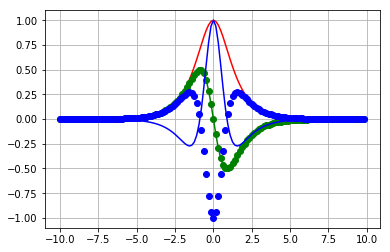

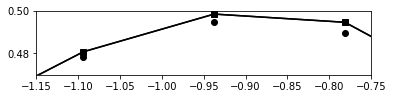

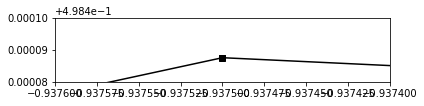

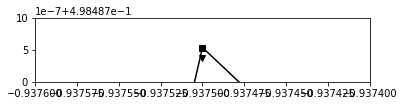

In [50]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=[]
for i, k in enumerate(x2):
    if i<n:
        x.append(k)
x=np.array(x)
dx = x[2]-x[1]
u=[]
for i, k in enumerate(x):
    u.append(sech(k))
u=np.array(u)
ut=np.fft.fft(u)
ik=np.linspace(0,n/2-1,n/2)
ik2=np.linspace(-n/2,-1,n/2)
ik=np.array(np.concatenate((ik,ik2)))
k = (2j*np.pi/L)* ik
#Calculo de derivadas con FFT
ut1=k*ut
ut2=-k*k*ut
u1 =np.fft.ifft(ut1).real
u2=np.fft.ifft(ut2).real
u1exact=[]
u2exact=[]
ux=[]
for i, x1 in enumerate(x):
    u1exact.append(-sech(x1)*math.tanh(x1))
    u2exact.append(sech(x1)-2*(sech(x1))**3)
u1exact=np.array(u1exact)
u2exact=np.array(u2exact)
# Calculo de 1 derivada por diferencias finitas
# 2 orden acierto
t=-3*u[0]+4*u[1]-u[2]/(2*dx)
ux.append(t)
for t in range(1,n-1):
         ux.append((u[t+1]-u[t-1])/(2*dx))        
ux.append((-3*u[n-1]+4*u[n-2]-u[n-3])/(2*dx) )
ux=np.array(ux)

# 4th-order acurrate
ux2=[]
ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))
for j in range(1,n-2):
    a=(-u[j+2]+8*u[j+1]-8*[j-1]+u[j-2])/(12*dx)
    ux2.append(a[0])
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))

ux2=np.array(ux2)
#Figura 1
figure()
plot(x,u,'r',x,u1,'g',x,u1exact,'go',x,u2,'b',x,u2exact,'bo')
grid(True)

plt.figure()
grid(True)
plt.subplot(3,1,1)
plt.plot(x,u1exact,'ks-')
plot(x,u1,'k')
plot(x,ux,'ko')
plot(x,ux2,'k*')
xlim(-1.15, -0.75)
ylim(0.47 ,0.5)
show()

plt.subplot(3,1,2)
plot(x,u1exact,'ks-')
plot(x,u1,'kv')
plot(x,ux,'ko')
plot(x,ux2,'k*')
xlim(-0.9376, -0.9374)
ylim(0.49848, 0.49850)
show()

plt.subplot(3,1,3)
plot(x,u1exact,'ks-')
plot(x,u1,'kv')
plot(x,ux,'ko')
plot(x,ux2,'k*')
xlim(-0.9376, -0.9374)
ylim(0.498487, 0.498488)
show()

## 12.2   APLICACIONES DEL FFT: DETECTION DE RADAR Y FILTRADO

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


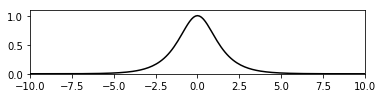

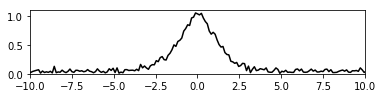

511


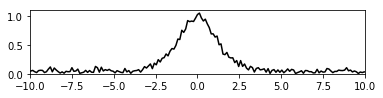

In [76]:
L = 30
n=512
t2 =linspace(-L,L,n+1)
t=t2[0:n-1]
ik=np.linspace(0,n/2-1,n/2)
ik2=np.linspace(-n/2,-1,n/2)
ik=np.array(np.concatenate((ik,ik2)))

k=(2*np.pi/(2*L))*(ik)
u=1/cosh(t) # Señal ideal en el tiempo

noise=1
ut=np.fft.fft(u)
r=[]
im=[]
for i in range(0,n-1):
    r.append(random.uniform(0,3))
    im.append(1j*random.uniform(0,3))
r=np.array(r)
im=np.array(im)
utn=ut+noise*(r)+noise*(im)
un =np.fft.ifft(utn)

figure()
title('Figure 82')
subplot(3,1,1)
plot(t,u,'k')
xlim(-10, 10)
ylim(0, 1.1)
show()

subplot(3,1,2)
plot(t,abs(un),'k')
xlim(-10, 10)
ylim(0, 1.1)
show()

noise=1
ut=np.fft.fft(u)
r=[]
im=[]
for i in range(0,n-1):
    r.append(random.uniform(0,3))
    im.append(1j*random.uniform(0,3))
r=np.array(r)
im=np.array(im)
print(len(r))
unt=ut+noise*(r)+noise*(im)
un =np.fft.ifft(unt)

subplot(3,1,3)
plot(t,abs(un),'k')
xlim(-10, 10)
ylim(0, 1.1)
show()

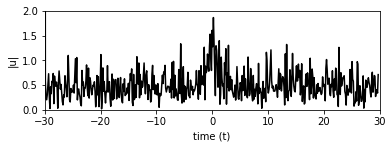

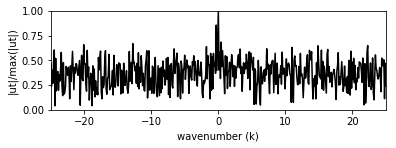

In [79]:
noise=10
ut=np.fft.fft(u)
r=[]
im=[]
for i in range(0,n-1):
    r.append(random.uniform(0,3))
    im.append(1j*random.uniform(0,3))
r=np.array(r)
im=np.array(im)
unt=ut+noise*(r)+noise*(im)
un =np.fft.ifft(unt)

figure
plt.title('figure 83')
subplot(2,1,1)
plot(t,abs(un),'k')
xlim(-30, 30)
ylim(0, 2)
xlabel('time (t)')
ylabel('|u|')
show()

subplot(2,1,2)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
xlim(-25, 25)
ylim(0, 1)
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()


$$F (k) = exp(-\tau(k-k_o)^2)$$

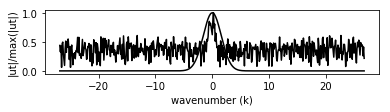

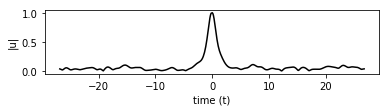

In [89]:
filtro=exp(-0.2*(k[0:len(k)-1]**2))
unft=filtro*unt
unf=np.fft.ifft(unft)

noise=10
ut=np.fft.fft(filtro)
r=[]
im=[]
for i in range(0,n-1):
    r.append(random.uniform(0,3))
    im.append(1j*random.uniform(0,3))
r=np.array(r)
im=np.array(im)
unt=ut+noise*(r)+noise*(im)
un =np.fft.ifft(unt)

figure


subplot(3,1,1)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(filtro))/max(abs(fftshift(filtro))),'k')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()

plt.title('figure 83')
subplot(3,1,3)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unf))/max(abs(fftshift(unf))),'k')
xlabel('time (t)')
ylabel('|u|')
show()


In [54]:

len(t)

511